# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : pyaozerskiy
Processing Record 2 of Set 1 : ilulissat
City not found. Skipping...
Processing Record 3 of Set 1 : quatre cocos
Processing Record 4 of Set 1 : mumford
Processing Record 5 of Set 1 : victoria
Processing Record 6 of Set 1 : cape town
Processing Record 7 of Set 1 : rikitea
Processing Record 8 of Set 1 : thompson
Processing Record 9 of Set 1 : provideniya
Processing Record 10 of Set 1 : dunedin
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : ribeira grande
Processing Record 13 of Set 1 : busselton
City not found. Skipping...
Processing Record 14 of Set 1 : yelan
Processing Record 15 of Set 1 : bilma
Processing Record 16 of Set 1 : hilo
Processing Record 17 of Set 1 : barrow
Processing Record 18 of Set 1 : hoima
Processing Record 19 of Set 1 : new norfolk
Processing Record 20 of Set 1 : yellowknife
Processing Record 21 of Set 1 : gueret
Processing Record 22 of Set 1 : 

Processing Record 35 of Set 4 : zhigansk
City not found. Skipping...
Processing Record 36 of Set 4 : hambantota
Processing Record 37 of Set 4 : nivala
Processing Record 38 of Set 4 : tuatapere
Processing Record 39 of Set 4 : damaturu
City not found. Skipping...
Processing Record 40 of Set 4 : kambove
Processing Record 41 of Set 4 : penarroya-pueblonuevo
Processing Record 42 of Set 4 : norman wells
Processing Record 43 of Set 4 : am timan
City not found. Skipping...
Processing Record 44 of Set 4 : cayenne
Processing Record 45 of Set 4 : uruacu
Processing Record 46 of Set 4 : tingi
Processing Record 47 of Set 4 : gladstone
City not found. Skipping...
Processing Record 48 of Set 4 : nemuro
Processing Record 49 of Set 4 : arraial do cabo
Processing Record 50 of Set 4 : charters towers
Processing Record 0 of Set 5 : tuy hoa
Processing Record 1 of Set 5 : saint-philippe
City not found. Skipping...
Processing Record 2 of Set 5 : menongue
Processing Record 3 of Set 5 : banda aceh
Processing Re

KeyboardInterrupt: 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df= pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Temp" : max_temp_list,
                "Wind" : wind_speed_list
})

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Temp,Wind
count,273.000000,2.730000e+02,273.000000,273.000000,273.000000,273.000000,273.000000
mean,58.912088,1.610506e+09,75.252747,18.849111,23.963137,48.681282,7.923150
std,38.093726,7.850355e+01,19.194588,35.484113,93.705640,32.437537,7.847601
min,0.000000,1.610505e+09,19.000000,-54.800000,-175.200000,-40.670000,0.270000
25%,20.000000,1.610506e+09,65.000000,-10.616700,-52.315800,30.200000,3.440000
50%,75.000000,1.610506e+09,81.000000,22.075200,25.570100,60.400000,5.820000
75%,93.000000,1.610506e+09,88.000000,50.233400,109.209100,74.680000,10.360000
max,100.000000,1.610506e+09,100.000000,78.218600,179.316700,96.010000,77.110000


In [8]:
#  Get the indices of cities that have humidity over 100%.
cities_low_humidity = cities_df[cities_df.Humidity > 100].index

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(cities_low_humidity, inplace=False)
clean_city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind
0,Pyaozerskiy,68,RU,1610505646,91,65.8333,31.1667,-10.52,5.48
1,Ilulissat,20,GL,1610505646,86,69.2167,-51.1000,19.40,8.05
2,Quatre Cocos,75,MU,1610505646,88,-20.2078,57.7625,77.00,12.66
3,Mumford,0,GH,1610505646,86,5.2618,-0.7590,79.03,12.19
4,Hong Kong,0,HK,1610505412,30,22.2855,114.1577,57.99,5.57


In [10]:
clean_city_data.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

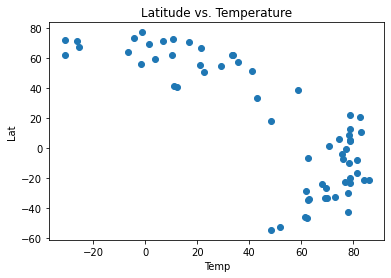

<Figure size 432x288 with 0 Axes>

In [12]:
x_values =clean_city_data['Temp']
y_values =clean_city_data['Lat']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Temperature')
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.show()
plt.savefig(f'output_data/''Latitude vs.Temp.png')
plt.show()


## Latitude vs. Humidity Plot

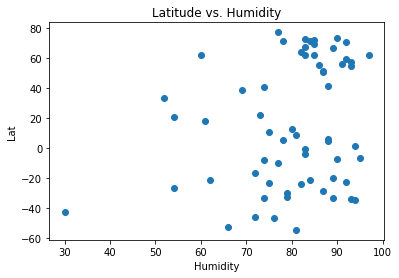

<Figure size 432x288 with 0 Axes>

In [13]:
x_values =clean_city_data['Humidity']
y_values =clean_city_data['Lat']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()
plt.savefig(f'output_data/''Latitude vs.Humidity.png')
plt.show()


## Latitude vs. Cloudiness Plot

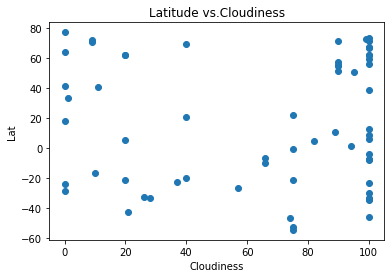

In [14]:
x_values =clean_city_data['Cloudiness']
y_values =clean_city_data['Lat']
plt.scatter(x_values,y_values)
plt.title('Latitude vs.Cloudiness')
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig(f'output_data/''Latitude vs.Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

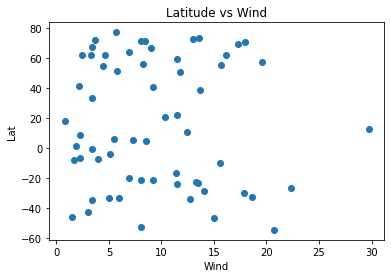

<Figure size 432x288 with 0 Axes>

In [15]:
x_values =clean_city_data['Wind']
y_values =clean_city_data['Lat']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Wind')
plt.xlabel('Wind')
plt.ylabel('Lat')
plt.show()
plt.savefig(f'output_data/''Latitude vs.Wind.png')
plt.show()

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = cities_df.loc[cities_df["Lat"] >= 0]
southern_hemisphere = cities_df.loc[cities_df["Lat"] < 0]

In [30]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7656380412812638


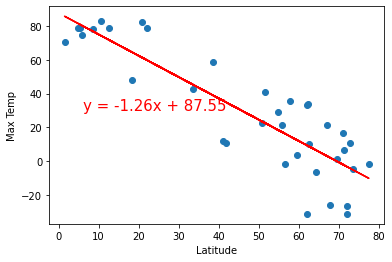

In [31]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.427980456905319


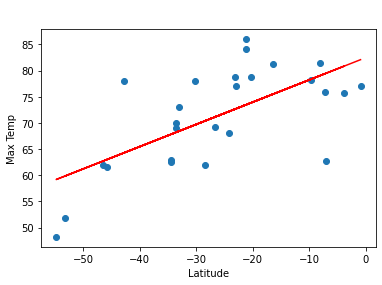

In [32]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0733628682673198


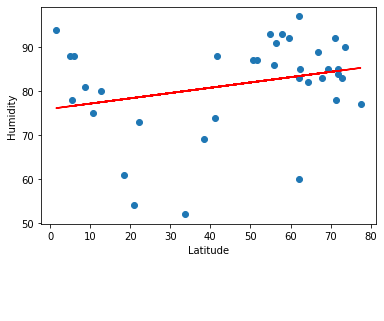

In [34]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08872221058766963


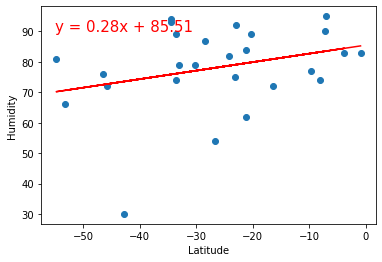

In [35]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,90))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002819757863683954


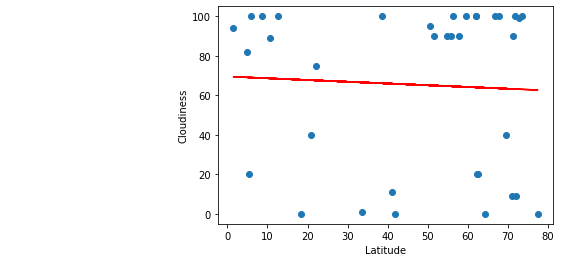

In [36]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,90))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.000984013765647994


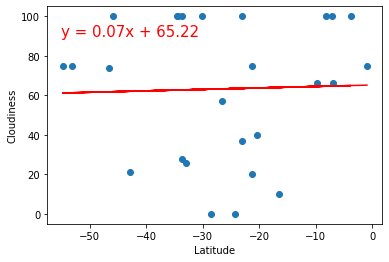

In [37]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,90))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005782125836372599


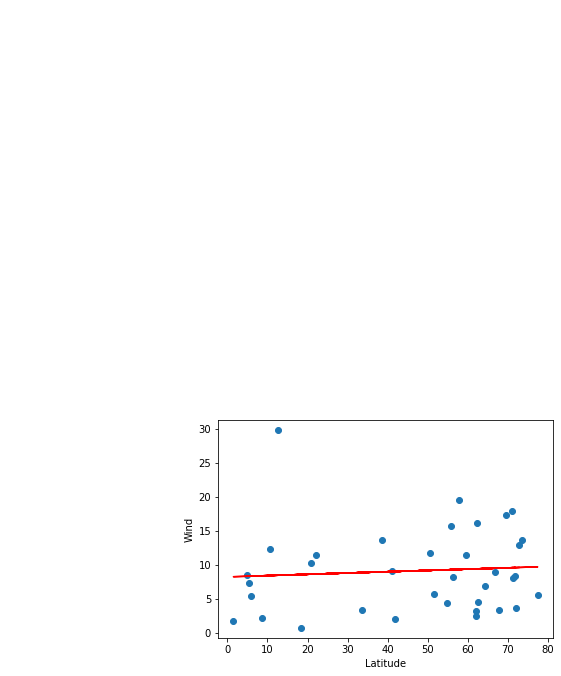

In [67]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind"]
plot_linear_regression(x_values, y_values, "Wind", (-55,90))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08313937082581063


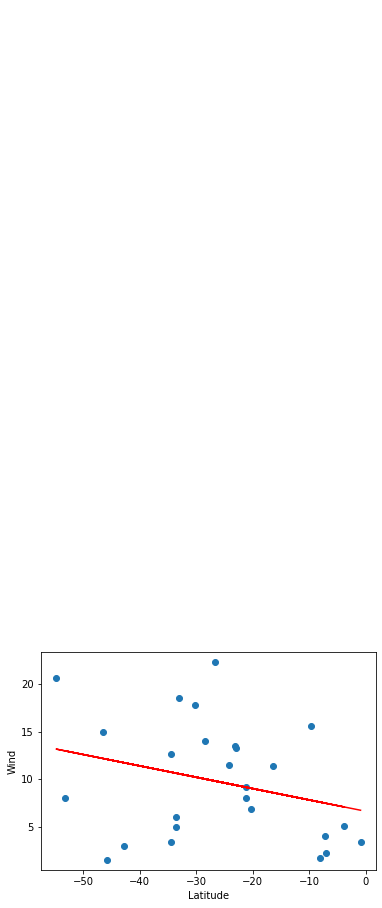

In [68]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind"]
plot_linear_regression(x_values, y_values, "Wind", (-55,90))